In [32]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score, average_precision_score

from sklearn.tree import DecisionTreeClassifier
import optuna
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier




In [ ]:
# mergind monthly csv files 

df_jan25 = pd.read_csv('F_jan25.csv')
df_feb25 = pd.read_csv('F_feb25.csv')
df_mar25 = pd.read_csv('F_mar25.csv')
df_apr25 = pd.read_csv('F_apr25.csv')
df_jan24 = pd.read_csv('F_jan24.csv')
df_feb24 = pd.read_csv('F_feb24.csv')
df_mar24 = pd.read_csv('F_mar24.csv')
df_apr24 = pd.read_csv('F_apr24.csv')
df_may24 = pd.read_csv('F_may24.csv')
df_jun24 = pd.read_csv('F_jun24.csv')
df_jul24 = pd.read_csv('F_jul24.csv')
df_aug24 = pd.read_csv('F_aug24.csv')
df_sep24 = pd.read_csv('F_sep24.csv')
df_oct24 = pd.read_csv('F_oct24.csv')
df_nov24 = pd.read_csv('F_nov24.csv')
df_dec24 = pd.read_csv('F_dec24.csv')
df_jan23 = pd.read_csv('F_jan23.csv')
df_feb23 = pd.read_csv('F_feb23.csv')
df_mar23 = pd.read_csv('F_mar23.csv')
df_apr23 = pd.read_csv('F_apr23.csv')
df_may23 = pd.read_csv('F_may23.csv')
df_jun23 = pd.read_csv('F_jun23.csv')
df_jul23 = pd.read_csv('F_jul23.csv')
df_aug23 = pd.read_csv('F_aug23.csv')
df_sep23 = pd.read_csv('F_sep23.csv')
df_oct23 = pd.read_csv('F_oct23.csv')
df_nov23 = pd.read_csv('F_nov23.csv')
df_dec23 = pd.read_csv('F_dec23.csv')



In [ ]:
# concate to make a final dataset

combined_df = pd.concat([df_jan25, df_feb25, df_mar25, df_apr25, df_jan24, df_feb24, df_mar24, df_apr24, df_may24, df_jun24,
                         df_jul24, df_aug24, df_sep24, df_oct24, df_nov24, df_dec24, df_jan23, df_feb23, df_mar23, df_apr23, df_may23, 
                         df_jun23, df_jul23, df_aug23, df_sep23, df_oct23, df_nov23, df_dec23], ignore_index=True)

In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453429 entries, 0 to 453428
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 453429 non-null  int64  
 1   QUARTER              453429 non-null  int64  
 2   MONTH                453429 non-null  int64  
 3   FL_DATE              453429 non-null  object 
 4   OP_UNIQUE_CARRIER    453429 non-null  object 
 5   TAIL_NUM             444108 non-null  object 
 6   OP_CARRIER_FL_NUM    453428 non-null  float64
 7   ORIGIN_AIRPORT_ID    453429 non-null  int64  
 8   ORIGIN               453429 non-null  object 
 9   ORIGIN_CITY_NAME     453429 non-null  object 
 10  ORIGIN_STATE_NM      453429 non-null  object 
 11  DEST_AIRPORT_ID      453429 non-null  int64  
 12  DEST                 453429 non-null  object 
 13  DEST_CITY_NAME       453429 non-null  object 
 14  DEST_STATE_NM        453429 non-null  object 
 15  CRS_DEP_TIME     

In [5]:
# Ensure FL_DATE is in datetime format
combined_df['FL_DATE'] = pd.to_datetime(combined_df['FL_DATE'])

# Create is_weekend column: 1 if Saturday or Sunday, else 0
combined_df['is_weekend'] = combined_df['FL_DATE'].dt.weekday.isin([5, 6]).astype(int)

In [6]:
# combined_df2 = combined_df[['YEAR', 'QUARTER', 'MONTH', 'ORIGIN', 'DEST', 
#        'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED', 'CANCELLATION_CODE', 'AIR_TIME', 'DISTANCE', 
#        'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]


combined_df2 = combined_df[['YEAR', 'QUARTER', 'MONTH', 'is_weekend', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 
       'CANCELLED', 'CANCELLATION_CODE', 
       'AIR_TIME', 'DISTANCE', 
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [7]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453429 entries, 0 to 453428
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 453429 non-null  int64  
 1   QUARTER              453429 non-null  int64  
 2   MONTH                453429 non-null  int64  
 3   is_weekend           453429 non-null  int64  
 4   ORIGIN               453429 non-null  object 
 5   DEST                 453429 non-null  object 
 6   CRS_DEP_TIME         453429 non-null  int64  
 7   DEP_TIME             444107 non-null  float64
 8   DEP_DELAY_NEW        444102 non-null  float64
 9   DEP_DEL15            444102 non-null  float64
 10  CRS_ARR_TIME         453429 non-null  int64  
 11  ARR_TIME             443554 non-null  float64
 12  ARR_DELAY_NEW        442906 non-null  float64
 13  ARR_DEL15            442906 non-null  float64
 14  CANCELLED            453429 non-null  float64
 15  CANCELLATION_CODE

In [8]:
combined_df2.sample(5)

,YEAR,QUARTER,MONTH,is_weekend,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,ARR_DEL15,CANCELLED,CANCELLATION_CODE,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
258450,2024,4,11,1,DEN,IAH,636,625.0,0.0,0.0,...,0.0,0.0,NaN,99.0,862.0,NaN,NaN,NaN,NaN,NaN
264776,2024,4,12,0,DEN,ONT,807,823.0,16.0,1.0,...,0.0,0.0,NaN,113.0,819.0,NaN,NaN,NaN,NaN,NaN
211206,2024,3,9,0,DEN,MSN,1544,1541.0,0.0,0.0,...,0.0,0.0,NaN,105.0,826.0,NaN,NaN,NaN,NaN,NaN
335395,2023,2,5,0,TPA,LAS,2126,8.0,162.0,1.0,...,1.0,0.0,NaN,249.0,1984.0,0.0,0.0,136.0,0.0,0.0
403801,2023,3,9,0,STL,MCO,1754,1900.0,66.0,1.0,...,1.0,0.0,NaN,114.0,882.0,36.0,0.0,0.0,0.0,21.0


In [ ]:
# filling missing values 

combined_df2[['CARRIER_DELAY', 'WEATHER_DELAY', 
              'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']] = combined_df2[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 
                                                                                     'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].fillna(0)



In [10]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453429 entries, 0 to 453428
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 453429 non-null  int64  
 1   QUARTER              453429 non-null  int64  
 2   MONTH                453429 non-null  int64  
 3   is_weekend           453429 non-null  int64  
 4   ORIGIN               453429 non-null  object 
 5   DEST                 453429 non-null  object 
 6   CRS_DEP_TIME         453429 non-null  int64  
 7   DEP_TIME             444107 non-null  float64
 8   DEP_DELAY_NEW        444102 non-null  float64
 9   DEP_DEL15            444102 non-null  float64
 10  CRS_ARR_TIME         453429 non-null  int64  
 11  ARR_TIME             443554 non-null  float64
 12  ARR_DELAY_NEW        442906 non-null  float64
 13  ARR_DEL15            442906 non-null  float64
 14  CANCELLED            453429 non-null  float64
 15  CANCELLATION_CODE

In [11]:
# df_clean = combined_df2.dropna()

# df_clean.info()


In [12]:
combined_df2.describe()

,YEAR,QUARTER,MONTH,is_weekend,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,453429.000000,453429.000000,453429.000000,453429.000000,453429.000000,444107.000000,444102.000000,444102.000000,453429.000000,443554.000000,442906.000000,442906.000000,453429.000000,442906.000000,453429.000000,453429.000000,453429.000000,453429.000000,453429.0,453429.000000
mean,2023.756789,2.373631,6.097166,0.292727,1375.971947,1361.242583,23.973468,0.286049,1416.547274,1385.132829,24.195703,0.293419,0.021576,126.310820,927.461911,6.426975,0.501221,3.957297,0.0,11.755437
std,0.693359,1.132018,3.480320,0.455015,553.425597,579.295084,70.109029,0.451913,625.654038,643.326863,69.751433,0.455329,0.145293,51.889743,425.261107,42.104598,13.408321,17.662979,0.0,47.640435
min,2023.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,21.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2023.000000,1.000000,3.000000,0.000000,916.000000,903.000000,0.000000,0.000000,1008.000000,946.000000,0.000000,0.000000,0.000000,88.000000,606.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,2024.000000,2.000000,6.000000,0.000000,1405.000000,1400.000000,0.000000,0.000000,1449.000000,1433.000000,0.000000,0.000000,0.000000,122.000000,895.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,2024.000000,3.000000,9.000000,1.000000,1839.000000,1841.000000,20.000000,1.000000,1940.000000,1930.000000,21.000000,1.000000,0.000000,151.000000,1123.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,2025.000000,4.000000,12.000000,1.000000,2359.000000,2400.000000,1393.000000,1.000000,2359.000000,2400.000000,1432.000000,1.000000,1.000000,630.000000,2446.000000,1393.000000,1251.000000,1386.000000,0.0,1381.000000


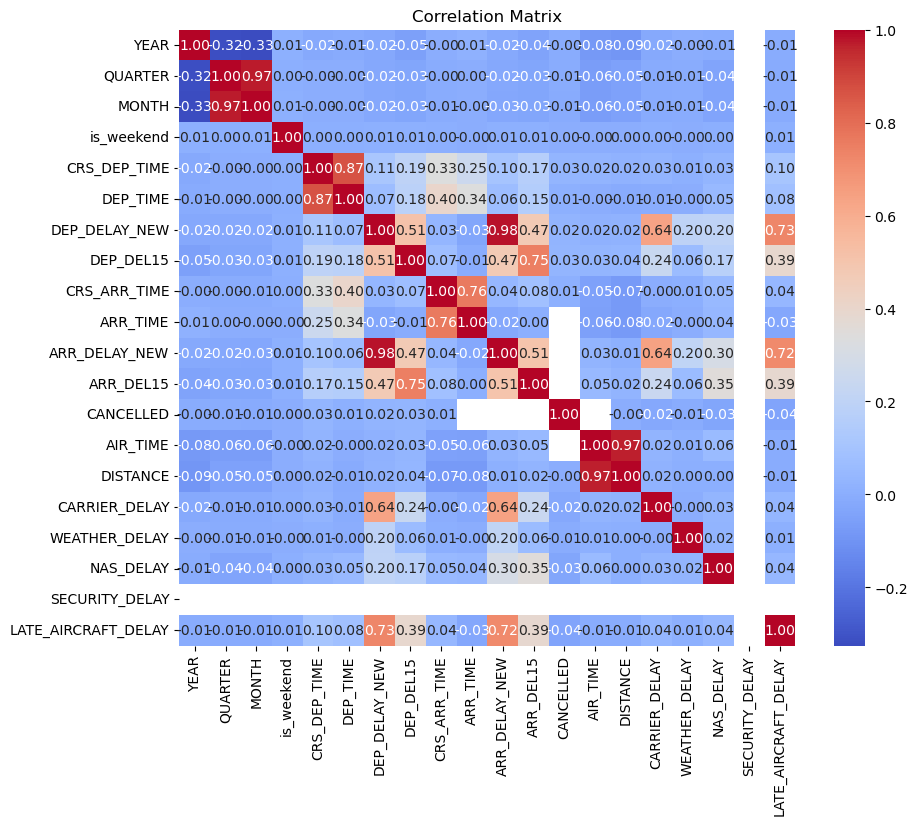

In [13]:
corr_matrix = combined_df2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

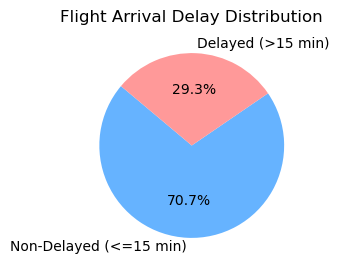

In [14]:

# Pie chart for delayed vs non-delayed flights (arrival delay)

delay_counts = combined_df2['ARR_DEL15'].value_counts().sort_index()
delay_labels = ['Non-Delayed (<=15 min)', 'Delayed (>15 min)']

plt.figure(figsize=(3, 3))
plt.pie(delay_counts, labels=delay_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Flight Arrival Delay Distribution')
plt.show()



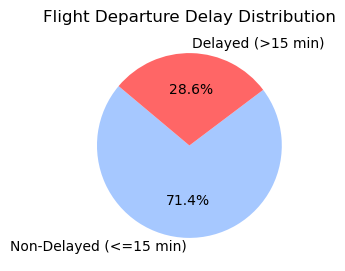

In [15]:
# Pie chart for departure delayed vs non-delayed flights (departure delay)

dep_delay_counts = combined_df2['DEP_DEL15'].value_counts().sort_index()
dep_delay_labels = ['Non-Delayed (<=15 min)', 'Delayed (>15 min)']

plt.figure(figsize=(3, 3))
plt.pie(dep_delay_counts, labels=dep_delay_labels, autopct='%1.1f%%', startangle=140, colors=['#a6c8ff','#ff6666'])
plt.title('Flight Departure Delay Distribution')
plt.show()


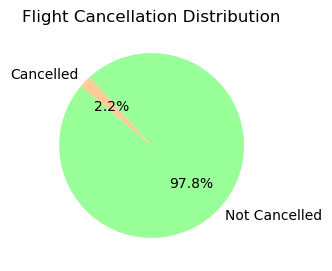

In [16]:
# Pie chart for cancelled vs non-cancelled flights

cancel_counts = combined_df2['CANCELLED'].value_counts().sort_index()
cancel_labels = ['Not Cancelled', 'Cancelled']

plt.figure(figsize=(3, 3))
plt.pie(cancel_counts, labels=cancel_labels, autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99'])
plt.title('Flight Cancellation Distribution')
plt.show()


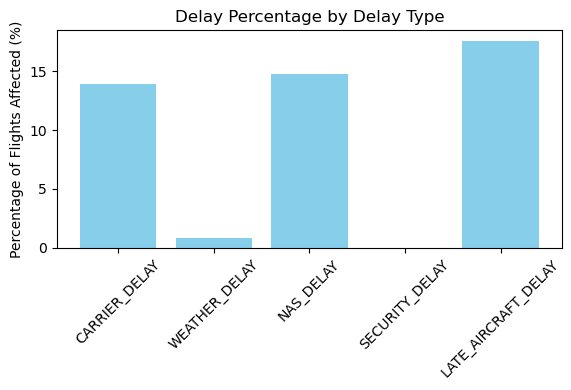

In [17]:
delay_columns = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Calculate percentage of flights affected by each delay type (i.e., delay > 0)
delay_percentages = [(combined_df2[col] > 0).mean() * 100 for col in delay_columns]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(delay_columns, delay_percentages, color='skyblue')
plt.ylabel('Percentage of Flights Affected (%)')
plt.title('Delay Percentage by Delay Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

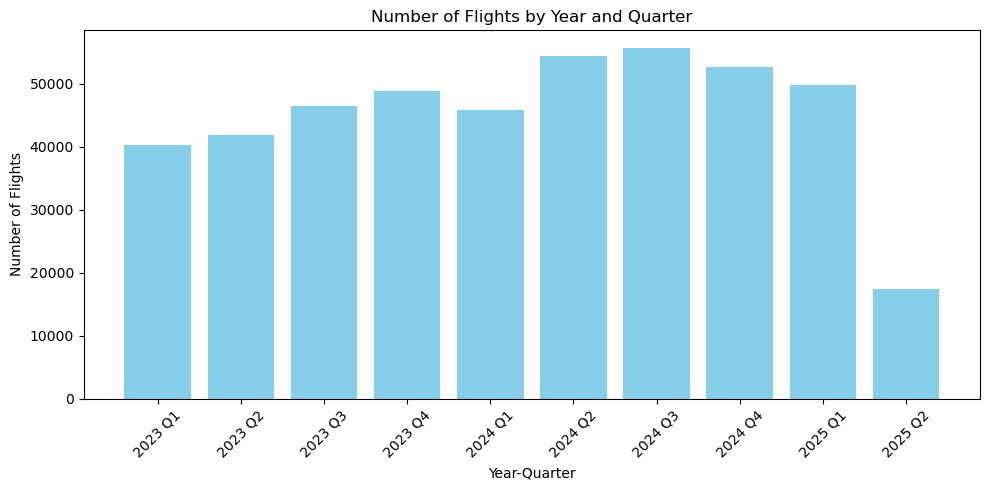

In [18]:


# Group by year and quarter, count number of flights
flights_per_quarter = combined_df2.groupby(['YEAR', 'QUARTER']).size().reset_index(name='FlightCount')

# Create combined column for x-axis
flights_per_quarter['Year-Quarter'] = flights_per_quarter['YEAR'].astype(str) + ' Q' + flights_per_quarter['QUARTER'].astype(str)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(flights_per_quarter['Year-Quarter'], flights_per_quarter['FlightCount'], color='skyblue')

plt.title('Number of Flights by Year and Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


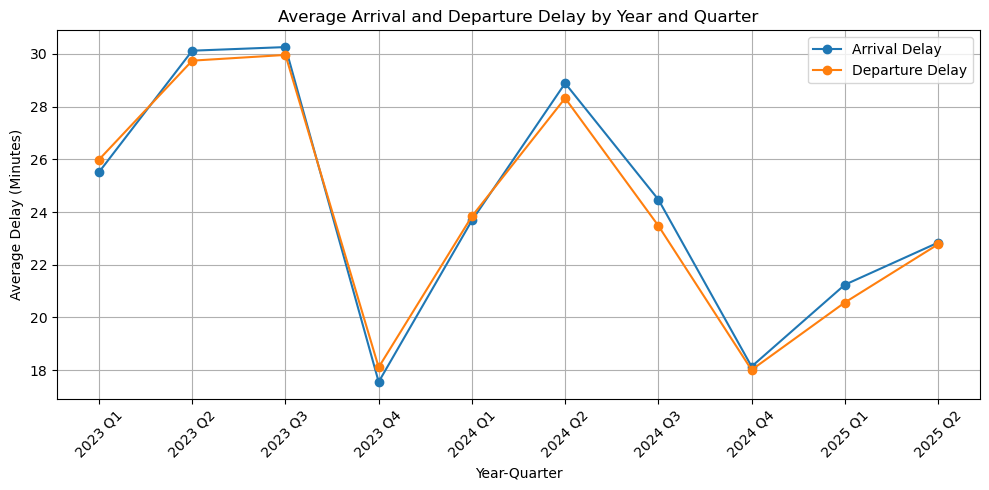

In [19]:

# Group by year and quarter, then calculate average delays
quarterly_delay = combined_df2.groupby(['YEAR', 'QUARTER'])[['ARR_DELAY_NEW', 'DEP_DELAY_NEW']].mean().reset_index()

# Create a combined column for plotting
quarterly_delay['Year-Quarter'] = quarterly_delay['YEAR'].astype(str) + ' Q' + quarterly_delay['QUARTER'].astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(quarterly_delay['Year-Quarter'], quarterly_delay['ARR_DELAY_NEW'], marker='o', label='Arrival Delay')
plt.plot(quarterly_delay['Year-Quarter'], quarterly_delay['DEP_DELAY_NEW'], marker='o', label='Departure Delay')

plt.title('Average Arrival and Departure Delay by Year and Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


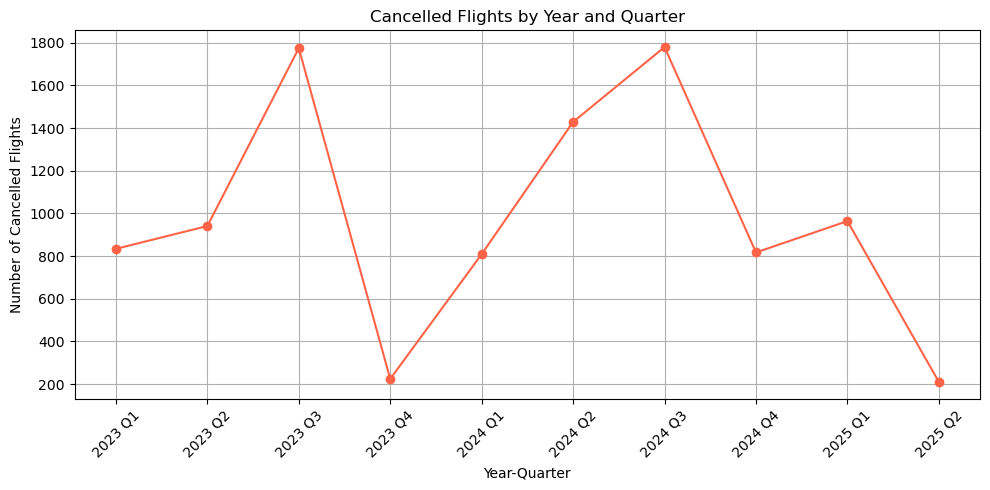

In [20]:


# Group by year and quarter, calculate total cancelled flights
cancelled_by_quarter = combined_df2.groupby(['YEAR', 'QUARTER'])['CANCELLED'].sum().reset_index()

# Create a combined column for plotting
cancelled_by_quarter['Year-Quarter'] = cancelled_by_quarter['YEAR'].astype(str) + ' Q' + cancelled_by_quarter['QUARTER'].astype(str)

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(cancelled_by_quarter['Year-Quarter'], cancelled_by_quarter['CANCELLED'], marker='o', color='tomato')

plt.title('Cancelled Flights by Year and Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


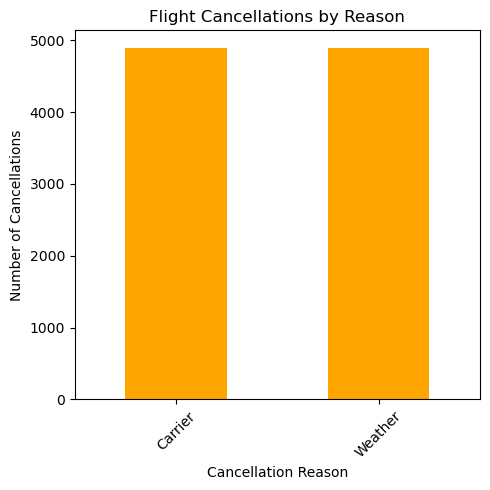

In [21]:


# Define mapping for cancellation codes
cancel_reason_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}

# Replace codes with descriptions
combined_df2['CancelledCodeMapped'] = combined_df2['CANCELLATION_CODE'].map(cancel_reason_map)

# Drop NaNs in case non-cancelled flights have null CancelledCode
cancel_reason_counts = combined_df2['CancelledCodeMapped'].dropna().value_counts()

# Plot bar chart
plt.figure(figsize=(5, 5))
cancel_reason_counts.plot(kind='bar', color='orange')

plt.title('Flight Cancellations by Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


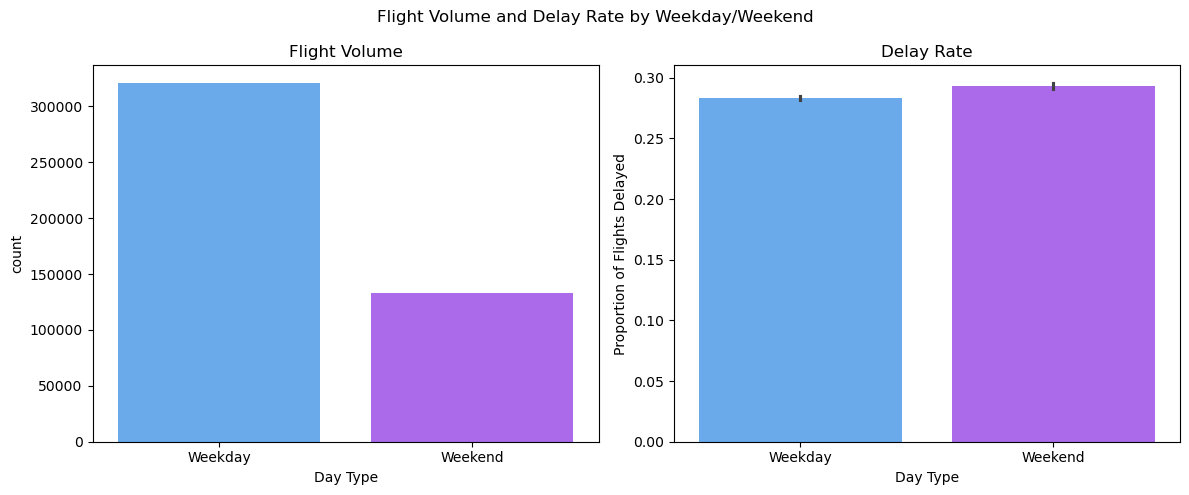

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Count of flights
sns.countplot(x='is_weekend', data=combined_df2, ax=ax[0], palette='cool')
ax[0].set_title('Flight Volume')
ax[0].set_xticklabels(['Weekday', 'Weekend'])
ax[0].set_xlabel('Day Type')

# Delay rate
sns.barplot(x='is_weekend', y='DEP_DEL15', data=combined_df2, estimator=lambda x: sum(x)/len(x), ax=ax[1], palette='cool')
ax[1].set_title('Delay Rate')
ax[1].set_xticklabels(['Weekday', 'Weekend'])
ax[1].set_xlabel('Day Type')
ax[1].set_ylabel('Proportion of Flights Delayed')

plt.suptitle('Flight Volume and Delay Rate by Weekday/Weekend')
plt.tight_layout()
plt.show()


In [23]:
data = combined_df2[['YEAR', 'QUARTER', 'MONTH', 'is_weekend', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DEL15', 'CRS_ARR_TIME', 
       'AIR_TIME', 'DISTANCE']]



In [24]:
data['dep_minutes'] = (data['CRS_DEP_TIME'] // 100) * 60 + (data['CRS_DEP_TIME'] % 100)
data['arr_minutes'] = (data['CRS_ARR_TIME'] // 100) * 60 + (data['CRS_ARR_TIME'] % 100)

data[['dep_minutes', 'arr_minutes']]

,dep_minutes,arr_minutes
0,610,788
1,360,537
2,803,970
3,587,748
4,1141,1316
...,...,...
453424,889,1100
453425,1005,1086
453426,747,940
453427,480,687


In [25]:
# def time_bucket(mins):
#     if mins < 360:
#         return 'Late Night'
#     elif mins < 720:
#         return 'Morning'
#     elif mins < 1080:
#         return 'Afternoon'
#     else:
#         return 'Evening'

# data['dep_period'] = data['dep_minutes'].apply(time_bucket)
# data['arr_period'] = data['arr_minutes'].apply(time_bucket)

# data[['dep_period', 'arr_period']]


# Apply label encoding to ORIGIN and DEST columns
label_cols = ['ORIGIN', 'DEST']

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453429 entries, 0 to 453428
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   YEAR          453429 non-null  int64  
 1   QUARTER       453429 non-null  int64  
 2   MONTH         453429 non-null  int64  
 3   is_weekend    453429 non-null  int64  
 4   ORIGIN        453429 non-null  int64  
 5   DEST          453429 non-null  int64  
 6   CRS_DEP_TIME  453429 non-null  int64  
 7   DEP_DEL15     444102 non-null  float64
 8   CRS_ARR_TIME  453429 non-null  int64  
 9   AIR_TIME      442906 non-null  float64
 10  DISTANCE      453429 non-null  float64
 11  dep_minutes   453429 non-null  int64  
 12  arr_minutes   453429 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 45.0 MB


In [27]:
data.describe()

,YEAR,QUARTER,MONTH,is_weekend,ORIGIN,DEST,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,AIR_TIME,DISTANCE,dep_minutes,arr_minutes
count,453429.000000,453429.000000,453429.000000,453429.000000,453429.000000,453429.000000,453429.000000,444102.000000,453429.000000,442906.000000,453429.000000,453429.000000,453429.000000
mean,2023.756789,2.373631,6.097166,0.292727,42.906435,41.972355,1375.971947,0.286049,1416.547274,126.310820,927.461911,836.791171,861.927874
std,0.693359,1.132018,3.480320,0.455015,25.680837,25.575658,553.425597,0.451913,625.654038,51.889743,425.261107,332.978129,375.707477
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000,21.000000,1.000000,1.000000
25%,2023.000000,1.000000,3.000000,0.000000,20.000000,19.000000,916.000000,0.000000,1008.000000,88.000000,606.000000,556.000000,608.000000
50%,2024.000000,2.000000,6.000000,0.000000,43.000000,42.000000,1405.000000,0.000000,1449.000000,122.000000,895.000000,845.000000,889.000000
75%,2024.000000,3.000000,9.000000,1.000000,63.000000,62.000000,1839.000000,1.000000,1940.000000,151.000000,1123.000000,1119.000000,1180.000000
max,2025.000000,4.000000,12.000000,1.000000,95.000000,94.000000,2359.000000,1.000000,2359.000000,630.000000,2446.000000,1439.000000,1439.000000


In [28]:
X = data.drop(['DEP_DEL15', 'CRS_ARR_TIME', 'CRS_DEP_TIME'], axis=1)
y = data['DEP_DEL15']

In [29]:
# Reset index to align X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Drop rows where y is NaN
mask = ~y.isna()
X = X[mask]
y = y[mask]


In [30]:
X.sample(5)

,YEAR,QUARTER,MONTH,is_weekend,ORIGIN,DEST,AIR_TIME,DISTANCE,dep_minutes,arr_minutes
213825,2024,3,9,1,20,26,90.0,627.0,854,1026
308350,2023,1,3,0,84,19,105.0,846.0,1125,1323
428724,2023,4,11,0,63,1,108.0,666.0,929,1070
345014,2023,2,6,1,91,38,251.0,1984.0,1264,1383
421189,2023,4,10,0,63,20,222.0,1303.0,435,608


In [31]:
y.sample(5)

61879     0.0
14210     0.0
208005    0.0
62018     0.0
136823    0.0
Name: DEP_DEL15, dtype: float64

In [33]:
# Decision Tree

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions (class and probability)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_test_proba = clf.predict_proba(X_test)[:, 1]  # probability for class 1

# Metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_test_proba))



Train Accuracy: 0.9785381149005998
Test Accuracy: 0.6475833417772824
Precision: 0.38247139040631606
Recall: 0.37753375054118943
F1 Score: 0.37998653091946283
ROC-AUC Score: 0.5690104497028513
PR-AUC Score: 0.32472854031277354


In [34]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Define objective
def objective(trial):
    # Suggest hyperparameters
    params = {
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "max_depth": trial.suggest_int("max_depth", 3, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 100),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 50),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced",  # for imbalance
        "random_state": 42,
    }

    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Use F1 score as optimization target (or change to ROC AUC if preferred)
    return f1_score(y_test, y_pred)

# Run study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

# Best model with best hyperparameters
best_params = study.best_params
best_params["class_weight"] = "balanced"
best_params["random_state"] = 42

clf_best = DecisionTreeClassifier(**best_params)
clf_best.fit(X_train, y_train)

# Evaluate best model
y_pred = clf_best.predict(X_test)
y_proba = clf_best.predict_proba(X_test)[:, 1]

print("🔍 Best Hyperparameters:", best_params)
print("Train Accuracy:", accuracy_score(y_train, clf_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))


[I 2025-07-28 23:12:02,512] A new study created in memory with name: no-name-0998a6f2-0219-409f-a82e-f384b39bf649
[I 2025-07-28 23:12:02,800] Trial 0 finished with value: 0.47192537968323167 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.47192537968323167.
[I 2025-07-28 23:12:03,664] Trial 1 finished with value: 0.47510903179763697 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 1 with value: 0.47510903179763697.
[I 2025-07-28 23:12:04,561] Trial 2 finished with value: 0.4803912578327984 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 26, 'min_samples_leaf': 50, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.4803912578327984.
[I 2025-07-28 23:12:05,465] Trial 3 finished with value: 0.4716862960756458 and parameters: {'criterion': 'log_loss', '

🔍 Best Hyperparameters: {'criterion': 'log_loss', 'max_depth': 8, 'min_samples_split': 64, 'min_samples_leaf': 50, 'max_features': None, 'class_weight': 'balanced', 'random_state': 42}
Train Accuracy: 0.6061061525947067
Test Accuracy: 0.6019184652278178
Precision: 0.38406691986858355
Recall: 0.648758216239619
F1 Score: 0.4824951700720098
ROC-AUC Score: 0.6618968338167597
PR-AUC Score: 0.42951870954007104


In [35]:



# Train-test split (use the same as before if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:, 1]


# Evaluation
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_test_proba))


Train Accuracy: 0.9785071534925875
Test Accuracy: 0.6843426667117011
Precision: 0.432695260517965
Recall: 0.3327429448577164
F1 Score: 0.3761931249304706
ROC-AUC Score: 0.6430628136358477
PR-AUC Score: 0.41351128221974065


In [36]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1,
    }

    clf = RandomForestClassifier(**params)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    return f1_score(y_test, y_pred)  

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, timeout=600)

# Final best model
best_params = study.best_params
best_params["class_weight"] = "balanced"
best_params["random_state"] = 42
best_params["n_jobs"] = -1

clf_best = RandomForestClassifier(**best_params)
clf_best.fit(X_train, y_train)

# Final evaluation
y_pred = clf_best.predict(X_test)
y_proba = clf_best.predict_proba(X_test)[:, 1]

print("🔍 Best Hyperparameters:", best_params)
print("Train Accuracy:", accuracy_score(y_train, clf_best.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))


[I 2025-07-28 23:17:45,949] A new study created in memory with name: no-name-6f777f1b-f49e-4412-aa92-b672124b9f7b
[I 2025-07-28 23:19:53,749] Trial 0 finished with value: 0.46840493643871206 and parameters: {'n_estimators': 242, 'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 0 with value: 0.46840493643871206.
[I 2025-07-28 23:20:10,105] Trial 1 finished with value: 0.4830444213236461 and parameters: {'n_estimators': 75, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.4830444213236461.
[I 2025-07-28 23:20:44,916] Trial 2 finished with value: 0.4776358993068223 and parameters: {'n_estimators': 168, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 1 with value: 0.4830444213236461.
[I 2025-07-28 23:21:34,469] Trial 3 finished with value: 0.47720585564313994 an

🔍 Best Hyperparameters: {'n_estimators': 246, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced', 'random_state': 42, 'n_jobs': -1}
Train Accuracy: 0.7736214433082546
Test Accuracy: 0.6704157800520147
Precision: 0.43807449636485923
Recall: 0.5383555712992483
F1 Score: 0.4830655129789864
ROC-AUC Score: 0.6871590791441308
PR-AUC Score: 0.4717692011620707


In [37]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize BalancedRandomForest
clf = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate
print("Train Accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))


Train Accuracy: 0.9268072314590423
Test Accuracy: 0.647943616937436
Precision: 0.406714399363564
Recall: 0.5030503404573543
F1 Score: 0.4497818130630631
ROC-AUC Score: 0.6530482644990123
PR-AUC Score: 0.4220025276361722


In [41]:


# Train-test split (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define the objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }

    model = BalancedRandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use recall as optimization target (can switch to f1_score if preferred)
    return f1_score(y_test, y_pred)

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)

# Train final model with best parameters
best_params = study.best_params
best_params.update({
    'random_state': 42,
    'n_jobs': -1
})

final_model = BalancedRandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]

print("🔍 Best Hyperparameters:", best_params)
print("Train Accuracy:", accuracy_score(y_train, final_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))


[I 2025-07-28 23:42:06,718] A new study created in memory with name: no-name-a87a16d9-b880-4a66-81df-bbc3233b30ee
[I 2025-07-28 23:42:13,978] Trial 0 finished with value: 0.49543977025278507 and parameters: {'n_estimators': 66, 'max_depth': 16, 'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.49543977025278507.
[I 2025-07-28 23:42:24,930] Trial 1 finished with value: 0.4845537588317025 and parameters: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.49543977025278507.
[I 2025-07-28 23:43:15,246] Trial 2 finished with value: 0.48460193652501343 and parameters: {'n_estimators': 138, 'max_depth': 29, 'min_samples_split': 18, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.49543977025278507.
[I 2025-07-28 23:43:45,418] Trial 3 finished with value: 0.498342079

🔍 Best Hyperparameters: {'n_estimators': 247, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 14, 'max_features': 'log2', 'bootstrap': True, 'random_state': 42, 'n_jobs': -1}
Train Accuracy: 0.6973522366802616
Test Accuracy: 0.645815741772779
Precision: 0.4190649406226597
Recall: 0.6166804423977644
F1 Score: 0.4990206226610399
ROC-AUC Score: 0.6900802458603015
PR-AUC Score: 0.47327490507211434


In [38]:

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Initialize model
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # handle class imbalance
    random_state=42,
    n_jobs=-1
)

# Step 3: Train
xgb_clf.fit(X_train, y_train)

# Step 4: Predict
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# Step 5: Evaluate
print("Train Accuracy:", accuracy_score(y_train, xgb_clf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))



Train Accuracy: 0.6368367573835921
Test Accuracy: 0.6305378232625167
Precision: 0.4078963725417071
Recall: 0.6457275553981187
F1 Score: 0.4999695252026574
ROC-AUC Score: 0.6868091258957405
PR-AUC Score: 0.4663411056391802


In [39]:


# Train-test split (if not already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Handle imbalance ratio
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'scale_pos_weight': pos_weight,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Use recall as primary metric (or f1_score if preferred)
    return f1_score(y_test, y_pred)

# Run Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, timeout=600)

# Best params and retraining
best_params = study.best_params
best_params.update({
    'scale_pos_weight': pos_weight,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'random_state': 42,
    'n_jobs': -1
})

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Final evaluation
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("🔍 Best Hyperparameters:", best_params)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("PR-AUC Score:", average_precision_score(y_test, y_proba))


[I 2025-07-28 23:36:12,752] A new study created in memory with name: no-name-b1ded7d4-65b6-4021-b5fb-1923abe6f58f
[I 2025-07-28 23:36:15,213] Trial 0 finished with value: 0.5015749864225308 and parameters: {'n_estimators': 247, 'max_depth': 8, 'learning_rate': 0.25755057716315116, 'subsample': 0.9409340143241398, 'colsample_bytree': 0.9885734896803369, 'gamma': 4.38463444443509}. Best is trial 0 with value: 0.5015749864225308.
[I 2025-07-28 23:36:18,103] Trial 1 finished with value: 0.5009053801061903 and parameters: {'n_estimators': 137, 'max_depth': 6, 'learning_rate': 0.12984188578109054, 'subsample': 0.8014398953796712, 'colsample_bytree': 0.789814561196493, 'gamma': 2.658769395476162}. Best is trial 0 with value: 0.5015749864225308.
[I 2025-07-28 23:36:20,765] Trial 2 finished with value: 0.5018223375339758 and parameters: {'n_estimators': 192, 'max_depth': 6, 'learning_rate': 0.19103127602477785, 'subsample': 0.9461618593058668, 'colsample_bytree': 0.7412180935679672, 'gamma': 2.

🔍 Best Hyperparameters: {'n_estimators': 165, 'max_depth': 11, 'learning_rate': 0.05630654882943931, 'subsample': 0.7975029618175778, 'colsample_bytree': 0.7620731036713885, 'gamma': 3.4314659948507047, 'scale_pos_weight': 2.4958968000944624, 'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42, 'n_jobs': -1}
Train Accuracy: 0.6996293075058897
Test Accuracy: 0.6502403710834149
Precision: 0.4240952866378732
Recall: 0.6222300940685638
F1 Score: 0.5044030374577244
ROC-AUC Score: 0.6967126692878175
PR-AUC Score: 0.482881064607641


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 10, 20, 50],
#     'min_samples_leaf': [1, 5, 10, 20],
#     'class_weight': [None, 'balanced']
# }

# # Initialize classifier
# dt = DecisionTreeClassifier(random_state=42)

# # Grid search with 5-fold cross-validation
# grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Best model
# best_dt = grid_search.best_estimator_

# # Predict and evaluate
# y_test_pred = best_dt.predict(X_test)
# y_train_pred = best_dt.predict(X_train)

# print("Best parameters:", best_dt)
# print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Precision:", precision_score(y_test, y_test_pred))
# print("Recall:", recall_score(y_test, y_test_pred))
# print("F1 Score:", f1_score(y_test, y_test_pred))

In [32]:

# # Parameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'class_weight': [None, 'balanced']
# }

# # Base model
# rf = RandomForestClassifier(random_state=42)

# # Grid search with F1 scoring
# grid_search = GridSearchCV(
#     rf, param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1
# )

# # Fit
# grid_search.fit(X_train, y_train)

# # Best model
# best_rf = grid_search.best_estimator_

# # Predictions
# y_train_pred = best_rf.predict(X_train)
# y_test_pred = best_rf.predict(X_test)

# # Evaluation
# print("Best parameters:", best_rf)
# print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Precision:", precision_score(y_test, y_test_pred))
# print("Recall:", recall_score(y_test, y_test_pred))
# print("F1 Score:", f1_score(y_test, y_test_pred))


In [33]:


# rf = RandomForestClassifier(
#     n_estimators=100,
#     max_depth=15,
#     min_samples_split=10,
#     min_samples_leaf=5,
#     max_features='sqrt',
#     class_weight='balanced',
#     n_jobs=-1,
#     random_state=42
# )
# rf.fit(X_train, y_train)

# # Predictions
# y_train_pred = rf.predict(X_train)
# y_test_pred = rf.predict(X_test)

# # Evaluation
# print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Precision:", precision_score(y_test, y_test_pred))
# print("Recall:", recall_score(y_test, y_test_pred))
# print("F1 Score:", f1_score(y_test, y_test_pred))


In [34]:
# from imblearn.ensemble import BalancedRandomForestClassifier

# # Initialize and fit the model
# brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# brf.fit(X_train, y_train)

# # Predictions
# y_train_pred = brf.predict(X_train)
# y_test_pred = brf.predict(X_test)

# # Evaluation
# print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
# print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Precision:", precision_score(y_test, y_test_pred))
# print("Recall:", recall_score(y_test, y_test_pred))
# print("F1 Score:", f1_score(y_test, y_test_pred))



In [62]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import itertools

# # # List of numeric features to check for separability
# features = ['AIR_TIME', 'DISTANCE', 'dep_minutes', 'arr_minutes', 'YEAR', 'QUARTER', 'MONTH', 'is_weekend', 'ORIGIN', 'DEST']

# # Generate all unique pairs of features
# feature_pairs = list(itertools.combinations(features, 2))

# # Create scatter plots for each pair colored by the target
# for x_col, y_col in feature_pairs:
#     plt.figure(figsize=(6, 4))
#     sns.scatterplot(data=data, x=x_col, y=y_col, hue='DEP_DEL15', alpha=0.7)
#     plt.title(f'{x_col} vs {y_col} by Delay Class')
#     plt.tight_layout()
#     plt.show()


In [63]:
# df = pd.read_csv('T_ONTIME_REPORTING.csv')
# df = df[df['OP_UNIQUE_CARRIER']=='F9']
# df.to_csv('F_dec23.csv', index=False)
# df.info()